# 1. K-means Clustering

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

from IPython import display

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat data file format
from scipy.io import loadmat

# Library written for this exercise providing additional functions
import utils
# Auto reload the utils library
%load_ext autoreload
%autoreload 2

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## 1.1. Implementing K-means

### 1.1.1. Finding closest centroids

In [2]:
# Would be helpful in calculating the nearest centroid
from sklearn.metrics.pairwise import pairwise_distances_argmin_min

In [3]:
def findClosestCentroids(X, centroids):
    """
    Computes the centroid memberships for every example.
    
    Parameters
    ----------
    X : array_like
        The dataset of size (m, n) where each row is a single example. 
        That is, we have m examples each of n dimensions.
        
    centroids : array_like
        The k-means centroids of size (K, n). K is the number
        of clusters, and n is the the data dimension.
    
    Returns
    -------
    idx : array_like
        A vector of size (m, ) which holds the centroids assignment for each
        example (row) in the dataset X.
    
    Instructions
    ------------
    Go over every example, find its closest centroid, and store
    the index inside `idx` at the appropriate location.
    Concretely, idx[i] should contain the index of the centroid
    closest to example i. Hence, it should be a value in the 
    range 0..K-1

    Note
    ----
    You can use a for-loop over the examples to compute this.
    """
    # Set K
    K = centroids.shape[0]
    
    # You need to return the following variables correctly.
    idx = np.zeros(X.shape[0], dtype=int)
    
    #--------------------solution 1----------------------------
    
    #idx = pairwise_distances_argmin_min(X, centroids)[0]
    
    #--------------------solution 1----------------------------
    
    
    #--------------------solution 2----------------------------
    
    for i in range(X.shape[0]):
        temp = []
        for j in range(K):
            temp.append(np.sqrt(np.sum(np.square(X[i, :] - centroids[j, :]))))
        idx.put(i, np.argmin(temp))
    #--------------------solution 2----------------------------
    
    return idx

In [4]:
# Load an example dataset that we will be using
data = loadmat('ex7data2.mat')

In [5]:
X = data['X']

In [6]:
# Select an inital set of centroids
K = 3 # 3 centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

In [7]:
# Find the closest centroids for the examples using the initial_centroids
idx = findClosestCentroids(X, initial_centroids)

print("Closest centroids for the first 3 examples:")
print(idx[:3])
print("(The closest centroids should be 0, 2, 1 respectively)")

Closest centroids for the first 3 examples:
[0 2 1]
(The closest centroids should be 0, 2, 1 respectively)


### 1.1.2. Computing centroid means

In [8]:
def computeCentroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the data points
    assigned to each centroid.
    
    Parameters
    ----------
    X : array_like
        The datset where each row is a single data point. That is, it 
        is a matrix of size (m, n) where there are m datapoints each
        having n dimensions. 
    
    idx : array_like 
        A vector (size m) of centroid assignments (i.e. each entry in range [0 ... K-1])
        for each example.
    
    K : int
        Number of clusters
    
    Returns
    -------
    centroids : array_like
        A matrix of size (K, n) where each row is the mean of the data 
        points assigned to it.
    
    Instructions
    ------------
    Go over every centroid and compute mean of all points that
    belong to it. Concretely, the row vector centroids[i, :]
    should contain the mean of the data points assigned to
    cluster i.

    Note:
    -----
    You can use a for-loop over the centroids to compute this.
    """
    # Useful variables
    m, n = X.shape
    # You need to return the following variables correctly.
    centroids = np.zeros((K, n))
    
    #------------------CODE-------------------------------
    
    for i in range(K):
        index = np.array(np.where(idx == i)).ravel()
        length = len(index)
        centroids[i] = np.mean(X[index, :], axis=0)
    
    #------------------CODE-------------------------------
    
    return centroids

In [9]:
# Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, K)

print('Centroids computed after initial finding of closest centroids:')
print(centroids)
print('\nThe centroids should be')
print('   [ 2.428301 3.157924 ]')
print('   [ 5.813503 2.633656 ]')
print('   [ 7.119387 3.616684 ]')

Centroids computed after initial finding of closest centroids:
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

The centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]


## 1.2 K-means on example dataset

In [10]:
# Settings for running K-Means
K = 3
max_iters = 10

# For consistency, here we set centroids to specific values
# but in practice you want to generate them automatically, such as by
# setting them to be random examples (as can be seen in kMeansInitCentroids.)
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of k-Means
centroids, idx, anim = utils.runkMeans(X, initial_centroids, findClosestCentroids, computeCentroids,max_iters, True)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [11]:
from IPython import display
from matplotlib.animation import FuncAnimation

x = np.linspace(0, 2*np.pi, 100)

fig = plt.figure()

lines = plt.plot([])
line = lines[0]

#other setup
plt.xlim(0, 2*np.pi)
plt.ylim(-1.1, 1.1)

def animate(frame):
    y = np.sin(x + 2*np.pi * frame/100)
    line.set_data((x, y))

anim = FuncAnimation(fig, animate, frames=100, interval=20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

## 1.3. Random initialization

In [12]:
def kMeansInitCentroids(X, K):
    """
    This function initializes K centroids that are to be used in K-means on the dataset x.
    
    Parameters
    ----------
    X : array_like 
        The dataset of size (m x n).
    
    K : int
        The number of clusters.
    
    Returns
    -------
    centroids : array_like
        Centroids of the clusters. This is a matrix of size (K x n).
    
    Instructions
    ------------
    You should set centroids to randomly chosen examples from the dataset X.
    """
    m, n = X.shape
    
    # You should return these values correctly
    centroids = np.zeros((K, n))
    
    #--------------CODE---------------------------
    
    randindex = np.random.permutation(m)
    centroids = X[randindex[:K], :]
    
    #--------------CODE---------------------------
    
    return centroids

In [13]:
# Settings for running K-Means
K = 3
max_iters = 10

# For consistency, here we set centroids to specific values
# but in practice you want to generate them automatically, such as by
# setting them to be random examples (as can be seen in kMeansInitCentroids.)
initial_centroids = kMeansInitCentroids(X, K)

# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of k-Means
centroids, idx, anim = utils.runkMeans(X, initial_centroids, findClosestCentroids, computeCentroids,max_iters, True)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

## 1.4. Image compression with K-means

### 1.4.1. K-means on pixels

In [14]:
# Load 128x128 color image (bird_small.png)
img = mpl.image.imread('bird_small.png')

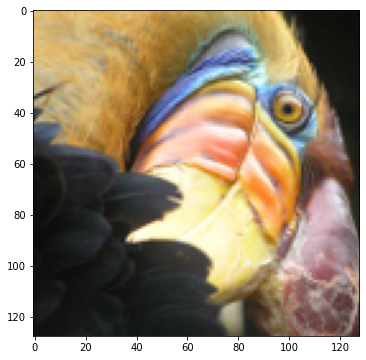

In [15]:
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.show()

In [16]:
# You should try different values for those parameters
K = 16
max_iters = 10

In [17]:
# Load an image of a bird
A = mpl.image.imread('bird_small.png')

In [18]:
# Divide by 255 so that all values are in range 0 - 1
A /= 255

In [19]:
A.shape

(128, 128, 3)

In [20]:
# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green, Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = A.reshape(-1, 3)

In [21]:
X.shape

(16384, 3)

In [22]:
# When using K-Means, it is important to randomly initialize centroids
# You should complete the code in kMeansInitCentroids above before proceeding
initial_centroids = kMeansInitCentroids(X, K)

In [23]:
# Run K-Means
centroids, idx, anim = utils.runkMeans(X, initial_centroids, findClosestCentroids, computeCentroids, max_iters, True)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [24]:
# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by its index in idx) to the centroid value
# Reshape the recovered image into proper dimensions
X_recovered = centroids[idx, :].reshape(A.shape)

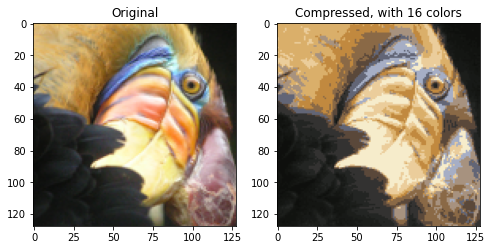

In [25]:
# Display the original image, rescale back by 255
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(A*255)
ax[0].set_title('Original')
ax[0].grid(False)

# Display compressed image, rescale back by 255
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed, with %d colors' % K)
ax[1].grid(False)

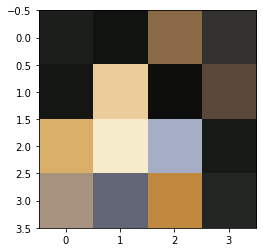

In [26]:
plt.imshow(centroids.reshape(4,4,3)*255)
plt.show()

# 2. Principal Component Analysis

## 2.1. Example Dataset

In [27]:
# Load the dataset into the variable X
data = loadmat('ex7data1.mat')
X = data['X']

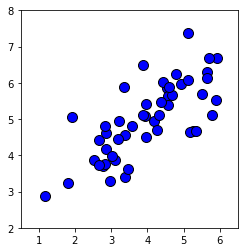

In [28]:
# Visualize the example dataset
plt.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=1)
plt.axis([0.5, 6.5, 2, 8])
plt.gca().set_aspect('equal')
plt.grid(False)

## 2.2. Implementing PCA

In [29]:
def pca(X):
    """
    Run principal component analysis.
    
    Parameters
    ----------
    X : array_like
        The dataset to be used for computing PCA. It has dimensions (m x n)
        where m is the number of examples (observations) and n is 
        the number of features.
    
    Returns
    -------
    U : array_like
        The eigenvectors, representing the computed principal components
        of X. U has dimensions (n x n) where each column is a single 
        principal component.
    
    S : array_like
        A vector of size n, contaning the singular values for each
        principal component. Note this is the diagonal of the matrix we 
        mentioned in class.
    
    Instructions
    ------------
    You should first compute the covariance matrix. Then, you
    should use the "svd" function to compute the eigenvectors
    and eigenvalues of the covariance matrix. 

    Notes
    -----
    When computing the covariance matrix, remember to divide by m (the
    number of examples).
    """
    # Useful values
    m, n = X.shape
    
    # You need to return the following variables correctly.
    U = np.zeros(n)
    S = np.zeros(n)
    
    #--------------------------CODE-------------------------
    
    Sigma = (1/m) * np.dot(X.T, X)
    U, S, V = np.linalg.svd(Sigma)
    
    #--------------------------CODE-------------------------
    
    return U, S

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
Top eigenvector: U[:, 0] = [-0.707107 -0.707107]
 (you should expect to see [-0.707107 -0.707107])


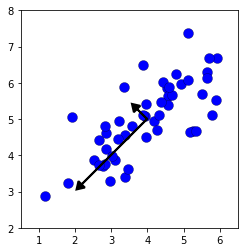

In [30]:
# Before running PCA, it is important to first normalize X
X_norm, mu, sigma = utils.featureNormalize(X)

# Run PCA
U, S = pca(X_norm)
print(U)

# Draw the eignenvectors centered at mean of data. These lines show the
# directions of maximum variations in the dataset.
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=0.25)

for i in range(2):
    ax.arrow(mu[0], mu[1], 1.5 * S[i] * U[0, i], 1.5 * S[i] * U[1, i],
            head_width=0.25, head_length=0.2, fc='k', ec='k', lw=2, zorder=1000)

ax.axis([0.5, 6.5, 2, 8])
ax.set_aspect('equal')
ax.grid(False)

print('Top eigenvector: U[:, 0] = [{:.6f} {:.6f}]'.format(U[0, 0], U[1, 0]))
print(' (you should expect to see [-0.707107 -0.707107])')

## 2.3. Dimensionality Reduction with PCA

### 2.3.1. Projecting the data onto the principal components

In [31]:
def projectData(X, U, K):
    """
    Computes the reduced data representation when projecting only 
    on to the top K eigenvectors.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). The dataset is assumed to be 
        normalized.
    
    U : array_like
        The computed eigenvectors using PCA. This is a matrix of 
        shape (n x n). Each column in the matrix represents a single
        eigenvector (or a single principal component).
    
    K : int
        Number of dimensions to project onto. Must be smaller than n.
    
    Returns
    -------
    Z : array_like
        The projects of the dataset onto the top K eigenvectors. 
        This will be a matrix of shape (m x k).
    
    Instructions
    ------------
    Compute the projection of the data using only the top K 
    eigenvectors in U (first K columns). 
    For the i-th example X[i,:], the projection on to the k-th 
    eigenvector is given as follows:
    
        x = X[i, :]
        projection_k = np.dot(x,  U[:, k])

    """
    # You need to return the following variables correctly.
    m, n = X.shape
    Z = np.zeros((m, K))
    
    #----------------------------CODE----------------------
    
    Z = np.dot(X, U[:, :K].reshape(n, K))
    
    #----------------------------CODE----------------------
    
    return Z

In [32]:
# Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, U, K)

In [33]:
print('Projection of the first example: {:.6}'.format(Z[0, 0]))
print('(this value should be about: 1.481274)')

Projection of the first example: 1.48127
(this value should be about: 1.481274)


### 2.3.2. Reconstructing an approximation of the data

In [34]:
def recoverData(Z, U, K):
    """
    Recovers an approximation of the original data when using the 
    projected data.
    
    Parameters
    ----------
    Z : array_like
        The reduced data after applying PCA. This is a matrix
        of shape (m x K).
    
    U : array_like
        The eigenvectors (principal components) computed by PCA.
        This is a matrix of shape (n x n) where each column represents
        a single eigenvector.
    
    K : int
        The number of principal components retained
        (should be less than n).
    
    Returns
    -------
    X_rec : array_like
        The recovered data after transformation back to the original 
        dataset space. This is a matrix of shape (m x n), where m is 
        the number of examples and n is the dimensions (number of
        features) of original datatset.
    
    Instructions
    ------------
    Compute the approximation of the data by projecting back
    onto the original space using the top K eigenvectors in U.
    For the i-th example Z[i,:], the (approximate)
    recovered data for dimension j is given as follows:

        v = Z[i, :]
        recovered_j = np.dot(v, U[j, :K])

    Notice that U[j, :K] is a vector of size K.
    """
    # You need to return the following variables correctly.
    X_rec = np.zeros((Z.shape[0], U.shape[0]))
    
    #-------------------CODE------------------------
    
    X_rec = np.dot(Z, U[:, :K].T)
    
    #-------------------CODE------------------------
    
    return X_rec

In [35]:
X_rec = recoverData(Z, U, K)
print('Approximation of the first example: [{:.6f} {:.6f}]'.format(X_rec[0, 0], X_rec[0, 1]))
print('(these values should be about [-1.047419 -1.047419])')

Approximation of the first example: [-1.047419 -1.047419]
(these values should be about [-1.047419 -1.047419])


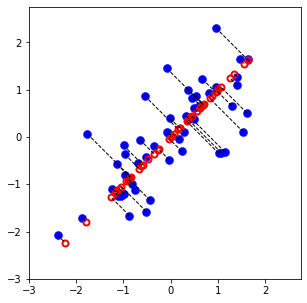

In [36]:
# Plot the normalized dataset (returned from featureNormalize)
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(X_norm[:, 0], X_norm[:, 1], 'bo', ms=8, mec='b', mew=0.5)
ax.set_aspect('equal')
ax.grid(False)
plt.axis([-3, 2.75, -3, 2.75])

# Draw lines connecting the projected points to the original points
ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro', mec='r', mew=2, mfc='none')
for xnorm, xrec in zip(X_norm, X_rec):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], '--k', lw=1)

## 2.4. Face Image Dataset

In [37]:
# Load Face dataset
data = loadmat('ex7faces.mat')
X = data['X']

In [38]:
X.shape

(5000, 1024)

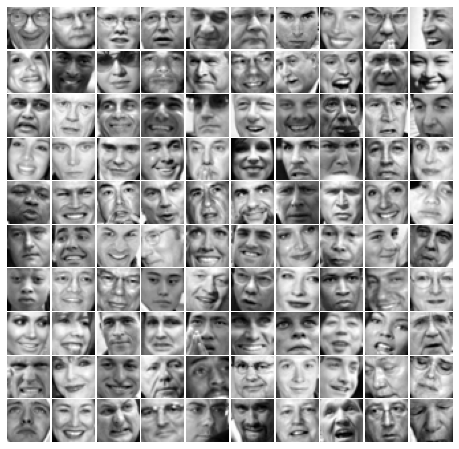

In [39]:
# Display the first 100 faces in the dataset
utils.displayData(X[:100, :], figsize=(8, 8))

In [40]:
# Normalize X by subtracting the mean value from each feature
X_norm, mu, sigma = utils.featureNormalize(X)

# Run PCA
U, S = pca(X_norm)

In [41]:
U.shape

(1024, 1024)

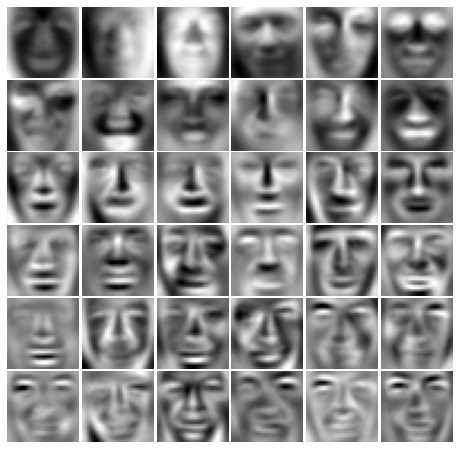

In [42]:
# Visualize the top 36 eigenvectors found
utils.displayData(U[:, :36].T, figsize=(8, 8))

### 2.4.2. Dimensionality Reduction

In [43]:
# Project images to the eigen space using the top k eigenvectors
# If you are applying a machine learning algorithm
K = 100
Z = projectData(X_norm, U, K)
print('The projected data Z has a shape of: ', Z.shape)

The projected data Z has a shape of:  (5000, 100)


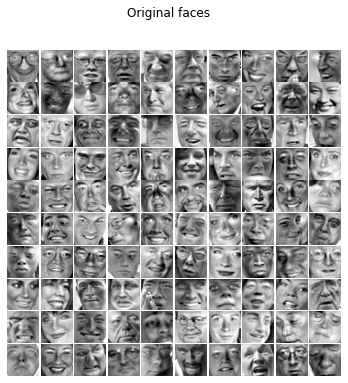

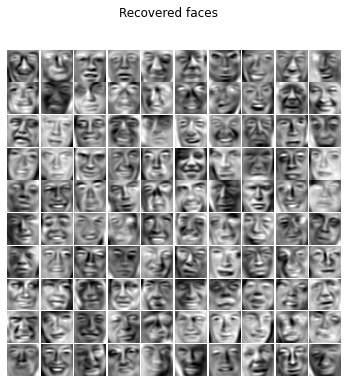

In [44]:
# Project images to the eigen space using the top K eigen vectors and
# visualize only using those K dimensions
# compare to the original input, which is also displayed
K = 100
X_rec = recoverData(Z, U, K)

# Display normalized data
utils.displayData(X_norm[:100, :], figsize=(6, 6))
plt.gcf().suptitle('Original faces')

# Display reconstructed data from only k eigenfaces
utils.displayData(X_rec[:100, :], figsize=(6, 6))
plt.gcf().suptitle('Recovered faces')
plt.show()

## 2.5. Optional (ungraded) exercise: PCA for visualization

<IPython.core.display.Javascript object>


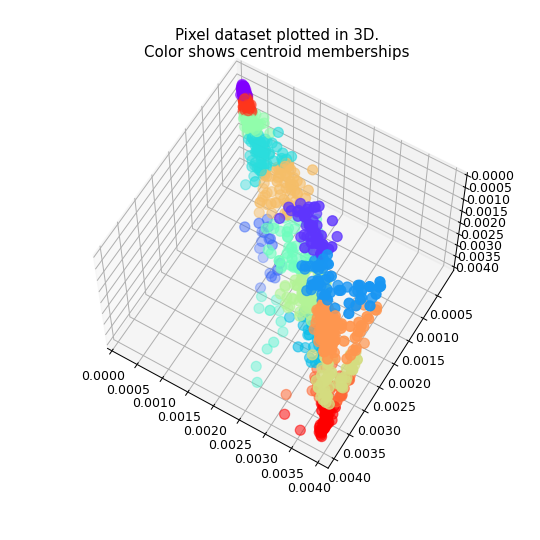

In [47]:
# this allows to have interactive plot to rotate the 3-D plot
# The double identical statement is on purpose
# see: https://stackoverflow.com/questions/43545050/using-matplotlib-notebook-after-matplotlib-inline-in-jupyter-notebook-doesnt
%matplotlib notebook
%matplotlib notebook
from matplotlib import pyplot


A = mpl.image.imread('bird_small.png')
A /= 255
X = A.reshape(-1, 3)

# perform the K-means clustering again here
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = utils.runkMeans(X, initial_centroids,
                                 findClosestCentroids,
                                 computeCentroids, max_iters)

#  Sample 1000 random indexes (since working with all the data is
#  too expensive. If you have a fast computer, you may increase this.
sel = np.random.choice(X.shape[0], size=1000)

fig = pyplot.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[sel, 0], X[sel, 1], X[sel, 2], cmap='rainbow', c=idx[sel], s=8**2)
ax.set_title('Pixel dataset plotted in 3D.\nColor shows centroid memberships')
pass

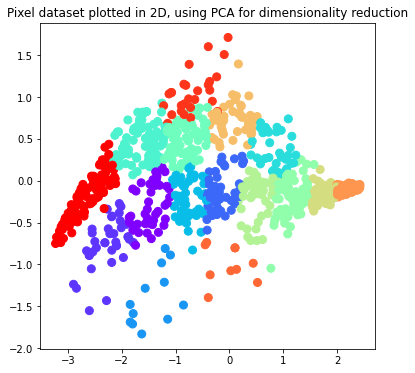

In [46]:
# Subtract the mean to use PCA
X_norm, mu, sigma = utils.featureNormalize(X)

# PCA and project the data to 2D
U, S = pca(X_norm)
Z = projectData(X_norm, U, 2)

# Reset matplotlib to non-interactive
%matplotlib inline

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(Z[sel, 0], Z[sel, 1], cmap='rainbow', c=idx[sel], s=64)
ax.set_title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')
ax.grid(False)
plt.show()

# REFERENCE:
https://github.com/sachin-101/Machine-Learning-by-Andrew-Ng-Implementation-in-Python/blob/master/Programming%20Assignments/Exercise%207/exercise7.ipynb